In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import csv
import os
import random
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
%cp /content/gdrive/MyDrive/mie1624/technical_skill.txt /content/
%cp /content/gdrive/MyDrive/mie1624/business_skill.txt /content/

%cp /content/gdrive/MyDrive/mie1624/Indeed_2011140748.txt /content/
%cp /content/gdrive/MyDrive/mie1624/Workopolis_2011190117.csv /content/

In [38]:
# List possible skill requirements
#technical_skill = ['excel', 'python', 'r', 'java', 'c', 'c++', 'matlab', 'sas','sql', 
#                   'tableau', 'hadoop', 'spark','power bi',
#                   'tensorflow', 'keras','pytorch','theano','caffe']
#business_skill = ['communication', 'problem solving', 'project management', 'consulting', 
#                  'presentation', 'leadership', 'documentation', 'marketing','lead', 
#                  'time management', 'collaborate', 'organize']

text_file = open("technical_skill.txt", "r")
technical_skill = text_file.read().splitlines()

text_file = open("business_skill.txt", "r")
business_skill = text_file.read().splitlines()

skills = technical_skill + business_skill

#job_info_data = pd.read_csv("Indeed_2011140748.txt")
job_info_data = pd.read_csv("Workopolis_2011190117.csv")

# Add columns for skills
for skill in skills:
  job_info_data[skill] = np.zeros(len(job_info_data))


job_info_data.head()

,Unnamed: 0,location,company,job_title,salary,job_description,job_url,excel,python,r,java,c,c++,matlab,sas,sql,tableau,hadoop,spark,power bi,tensorflow,keras,pytorch,theano,caffe,Optimization,Satistics,Modelling,Database,communication,problem solving,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize,Learning,Research
0,0,"— Toronto, ON",TD Bank,Sr Machine Learning Product Engineer (Layer 6),NaN,Tell us your story. Don't go unnoticed. Explai...,https://www.workopolis.com/jobsearch/viewjob/-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"— Oakville, ON",Prodigy Game,"Applied Scientist, Revenue & Modelling","Estimated: $58,000 - $83,000 a year","Prodigy Education connects students, parents, ...",https://www.workopolis.com/jobsearch/viewjob/P...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"— Toronto, ON",Spin Master Ltd,"Senior Manager, Data Science","Estimated: $84,000 - $120,000 a year",Are you looking to further your career with an...,https://www.workopolis.com/jobsearch/viewjob/C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"— Toronto, ON",TripStack,Data Scientist,"Estimated: $64,000 - $85,000 a year",Data ScientistAbout Tripstack TripStack is rev...,https://www.workopolis.com/jobsearch/viewjob/4...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"— Toronto, ON",Crescendo Technology,Machine Learning Engineer/Data Scientist,"Estimated: $94,000 - $120,000 a year",About the role:\nWe are looking for a candidat...,https://www.workopolis.com/jobsearch/viewjob/y...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
job_info_data = job_info_data.drop(job_info_data.columns[0],axis=1)
job_info_data = job_info_data.reset_index()
job_info_data = job_info_data.drop(["index"],axis=1)
job_info_data.head()

,location,company,job_title,salary,job_description,job_url,excel,python,r,java,c,c++,matlab,sas,sql,tableau,hadoop,spark,power bi,tensorflow,keras,pytorch,theano,caffe,Optimization,Satistics,Modelling,Database,communication,problem solving,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize,Learning,Research
0,"— Toronto, ON",TD Bank,Sr Machine Learning Product Engineer (Layer 6),NaN,Tell us your story. Don't go unnoticed. Explai...,https://www.workopolis.com/jobsearch/viewjob/-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"— Oakville, ON",Prodigy Game,"Applied Scientist, Revenue & Modelling","Estimated: $58,000 - $83,000 a year","Prodigy Education connects students, parents, ...",https://www.workopolis.com/jobsearch/viewjob/P...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"— Toronto, ON",Spin Master Ltd,"Senior Manager, Data Science","Estimated: $84,000 - $120,000 a year",Are you looking to further your career with an...,https://www.workopolis.com/jobsearch/viewjob/C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"— Toronto, ON",TripStack,Data Scientist,"Estimated: $64,000 - $85,000 a year",Data ScientistAbout Tripstack TripStack is rev...,https://www.workopolis.com/jobsearch/viewjob/4...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"— Toronto, ON",Crescendo Technology,Machine Learning Engineer/Data Scientist,"Estimated: $94,000 - $120,000 a year",About the role:\nWe are looking for a candidat...,https://www.workopolis.com/jobsearch/viewjob/y...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# For each job, check its job details/description page
# to collect the required skills.
# Set skill entries to 1 if they are mentioned in job details
for i in range(len(job_info_data)):
  #link = requests.get(job_info_data.iloc[i,1])
  #soup = BeautifulSoup(link.text, "lxml")
  try:
    #text = soup.find('div', class_='job-description').text.strip().lower()
    text = job_info_data['job_description'].values[i]
    # Preprocessing, replace punctuations, and replace multiple spaces
    text = re.sub(r'\n,', ' ', text)
    text = re.sub(r'\,', ' ', text) 
    text = re.sub('/', ' ', text) 
    text = re.sub(r'\(', ' ', text) 
    text = re.sub(r'\)', ' ', text) 
    text = re.sub(' +',' ',text) 
  except:
    text = "" 
  for s in skills :
    # This is specifically for C++, escape the ++. Convert C++ to C\+\+
    if any(x in s for x in ['+']):
      skill = re.escape(s)
    else:
      skill = s
    # print("check skill ",s, "for job ",str(i+1))
    matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',text)
    if matching:
      # print("matched skill ",s, "for job ",str(i+1))
      job_info_data[s][i] = 1

job_info_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,location,company,job_title,salary,job_description,job_url,excel,python,r,java,c,c++,matlab,sas,sql,tableau,hadoop,spark,power bi,tensorflow,keras,pytorch,theano,caffe,Optimization,Satistics,Modelling,Database,communication,problem solving,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize,Learning,Research
0,"— Toronto, ON",TD Bank,Sr Machine Learning Product Engineer (Layer 6),NaN,Tell us your story. Don't go unnoticed. Explai...,https://www.workopolis.com/jobsearch/viewjob/-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,"— Oakville, ON",Prodigy Game,"Applied Scientist, Revenue & Modelling","Estimated: $58,000 - $83,000 a year","Prodigy Education connects students, parents, ...",https://www.workopolis.com/jobsearch/viewjob/P...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"— Toronto, ON",Spin Master Ltd,"Senior Manager, Data Science","Estimated: $84,000 - $120,000 a year",Are you looking to further your career with an...,https://www.workopolis.com/jobsearch/viewjob/C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,"— Toronto, ON",TripStack,Data Scientist,"Estimated: $64,000 - $85,000 a year",Data ScientistAbout Tripstack TripStack is rev...,https://www.workopolis.com/jobsearch/viewjob/4...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,"— Toronto, ON",Crescendo Technology,Machine Learning Engineer/Data Scientist,"Estimated: $94,000 - $120,000 a year",About the role:\nWe are looking for a candidat...,https://www.workopolis.com/jobsearch/viewjob/y...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,"— Hamilton, ON",McMaster University,SEPT Grad - SESSIONAL FACULTY - SEP 786 Artifi...,"$8,100 a month",NOTICE OF POSTING\n\nFor Sessional Faculty\n\n...,https://www.workopolis.com/jobsearch/viewjob/G...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
531,"— Waterloo, ON",Google,"Software Developer Intern, Machine Learning, P...","Estimated: $57,000 - $75,000 a year",Please complete your application before Februa...,https://www.workopolis.com/jobsearch/viewjob/J...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
532,"— Waterloo, ON",BlackBerry,Senior/ Principal Machine Learning Engineer,"Estimated: $88,000 - $120,000 a year",Worker Sub-Type:\nRegular\n\nJob Description:\...,https://www.workopolis.com/jobsearch/viewjob/h...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
533,"— Waterloo, ON",RideCo,Software Engineer in Algorithms & Optimization,NaN,Role Summary:\nThis is an opportunity in the e...,https://www.workopolis.com/jobsearch/viewjob/v...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# Sanity check
job_info_data['excel'].sum()

8.0

In [42]:
import matplotlib.pyplot as plt
df_tech = job_info_data[technical_skill]
tech_count = df_tech.sum()
tech_count = tech_count.sort_values(ascending=False)
df_tcount = pd.DataFrame(data=tech_count,columns=["Count"])
df_tcount.index.name = "Technical Skills"
df_tcount
#plt.bar(,tech_count.to_list)

,Count
Technical Skills,
Optimization,21.0
python,15.0
pytorch,9.0
excel,8.0
spark,8.0
keras,8.0
Modelling,7.0
tensorflow,7.0
theano,6.0


Text(0.5, 1.0, 'Technical Skills Demand for Data Science Jobs on Indeed')

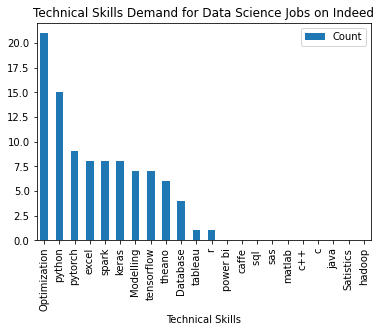

In [43]:
df_tcount.plot(kind="bar")
plt.title('Technical Skills Demand for Data Science Jobs on Indeed')

In [44]:
df_bus = job_info_data[business_skill]
bus_count = df_bus.sum()
bus_count = bus_count.sort_values(ascending=False)
df_bcount = pd.DataFrame(data=bus_count,columns=["Count"])
df_bcount.index.name = "Business Skills"
df_bcount
#plt.bar(,tech_count.to_list)

,Count
Business Skills,
communication,255.0
Learning,196.0
leadership,105.0
lead,88.0
Research,81.0
marketing,75.0
documentation,63.0
collaborate,61.0
presentation,60.0


Text(0.5, 1.0, 'Business Skills Demand for Data Science Jobs on Monster')

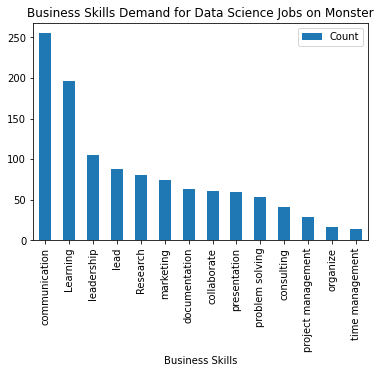

In [45]:
df_bcount.plot(kind="bar")
plt.title('Business Skills Demand for Data Science Jobs on Monster')

In [46]:
job_info_data.shape

(535, 42)

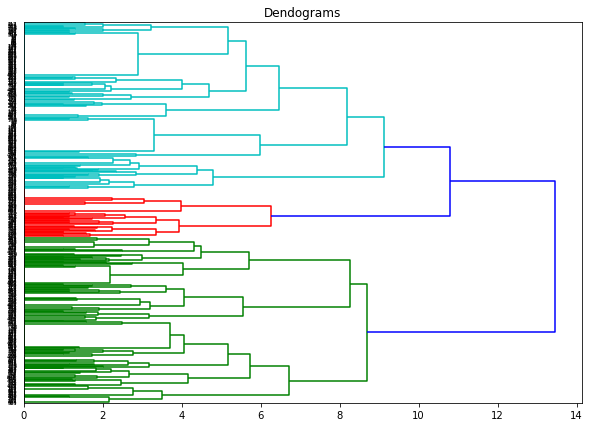

In [50]:
data = job_info_data.iloc[:, 6:41].values

from scipy.cluster import hierarchy

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#dn = hierarchy.dendrogram(hierarchy.linkage(data, method='ward'))
dn = hierarchy.dendrogram(hierarchy.linkage(data, method='ward'), orientation='right')

https://nycdatascience.com/blog/student-works/using-machine-learning-measure-job-skill-similarities/

In [ ]:
# AI
job_info_ai = pd.DataFrame()

base_URL = 'https://www.monster.ca/jobs/l-toronto-on'


pages = list(range(0,32))
for page in pages:
    
    newpage="https://www.monster.ca/jobs/search/?q=Artificial-Intelligence&stpage=1&page="+str(page)
    result = requests.get(newpage).text
    soup = BeautifulSoup(result, 'lxml')
    for jobs in soup.find_all('section', class_='card-content'): 
        try:
            position_title = jobs.find('h2', class_='title').text.strip()
        except:
            position_title = None
        try:
            employer = jobs.find('div', class_='company').text.strip()
        except:
            employer = None
        try:
            location = jobs.find('div', class_='location').text.strip()
        except:
            location = None
        try:
            salary=div.find('nobr').text
        except:
            try:
                div_two = div.find(name='div', attrs={'class':'sjcl'})
                div_three = div_two.find('div')
                salary=div_three.text.strip()
            except:
                salary = None
        try:
            link = jobs.find('a')['href']
        except:
            link = None
        job_info_ai = job_info_ai.append({
            'position_title': position_title, 
            'employer': employer,
            'location': location,
            'salary': salary,
            'link': link}, ignore_index = True)

#Delect duplicate jobs
job_info_ai = job_info_ai.drop_duplicates(['link'], keep='first')


In [ ]:
job_info_ai

,employer,link,location,position_title,salary
0,None,None,None,None,None
1,SAPSOL TECHNOLOIGES INC,https://job-openings.monster.ca/freshers-in-ar...,"Mississauga, ON","Freshers in Artificial Intelligence, Machine l...",None
3,Magna International Inc.,https://job-openings.monster.ca/robotics-weld-...,"Milton, ON",Robotics Weld Technician,None
4,Kutir Technologies,https://job-openings.monster.ca/machine-learni...,"Mississauga, ON",Machine Learning (Computer Vision),None
5,ADGA Group,https://job-openings.monster.ca/cognos-etl-pro...,"Toronto, ON",Cognos/ETL Programmer/Developer,None
...,...,...,...,...,...
2150,Digital Shift,https://job-openings.monster.ca/link-prospecto...,"Calgary, AB",Link Prospector & Outreach Specialist,None
2151,NCR,https://job-openings.monster.ca/technical-writ...,WATERLOO,"Technical Writer - Waterloo, CAN",None
2152,Pomeroy Lodging LP,https://job-openings.monster.ca/part-time-nigh...,"Olds, AB",Part Time Night auditor and Front desk agent,None
2153,Pro Mach Integrated Solutions Canada Inc,https://job-openings.monster.ca/electrical-pro...,"Oakville, ON",Electrical Project Engineer,None


In [ ]:
# List possible skill requirements
technical_skill = ['excel', 'python', 'r', 'java', 'c', 'c++', 'matlab', 'sas','sql', 
                   'tableau', 'hadoop', 'spark','power bi',
                   'tensorflow', 'keras','pytorch','theano','caffe']
business_skill = ['communication', 'problem solving', 'project management', 'consulting', 
                  'presentation', 'leadership', 'documentation', 'marketing','lead', 
                  'time management', 'collaborate', 'organize']
skills = technical_skill + business_skill 
# Add columns for skills
for skill in skills:
  job_info_ai[skill] = np.zeros(len(job_info_ai))


job_info_ai.head()

,employer,link,location,position_title,salary,excel,python,r,java,c,...,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize
0,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SAPSOL TECHNOLOIGES INC,https://job-openings.monster.ca/freshers-in-ar...,"Mississauga, ON","Freshers in Artificial Intelligence, Machine l...",None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Magna International Inc.,https://job-openings.monster.ca/robotics-weld-...,"Milton, ON",Robotics Weld Technician,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kutir Technologies,https://job-openings.monster.ca/machine-learni...,"Mississauga, ON",Machine Learning (Computer Vision),None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ADGA Group,https://job-openings.monster.ca/cognos-etl-pro...,"Toronto, ON",Cognos/ETL Programmer/Developer,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
job_info_ai = job_info_ai.drop([0])
job_info_ai = job_info_ai.reset_index()
job_info_ai = job_info_ai.drop(["index"],axis=1)
job_info_ai.head()

,employer,link,location,position_title,salary,excel,python,r,java,c,...,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize
0,SAPSOL TECHNOLOIGES INC,https://job-openings.monster.ca/freshers-in-ar...,"Mississauga, ON","Freshers in Artificial Intelligence, Machine l...",None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Magna International Inc.,https://job-openings.monster.ca/robotics-weld-...,"Milton, ON",Robotics Weld Technician,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Kutir Technologies,https://job-openings.monster.ca/machine-learni...,"Mississauga, ON",Machine Learning (Computer Vision),None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADGA Group,https://job-openings.monster.ca/cognos-etl-pro...,"Toronto, ON",Cognos/ETL Programmer/Developer,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Modis, Inc.",https://job-openings.monster.ca/data-architect...,"Toronto, ON",Data Architect/Modeller,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# For each job, check its job details/description page
# to collect the required skills.
# Set skill entries to 1 if they are mentioned in job details
for i in range(len(job_info_ai)):
  link = requests.get(job_info_ai.iloc[i,1])
  soup = BeautifulSoup(link.text, "lxml")
  try:
    text = soup.find('div', class_='job-description').text.strip().lower()
    # Preprocessing, replace punctuations, and replace multiple spaces
    text = re.sub(r'\,', ' ', text) 
    text = re.sub('/', ' ', text) 
    text = re.sub(r'\(', ' ', text) 
    text = re.sub(r'\)', ' ', text) 
    text = re.sub(' +',' ',text) 
  except:
    text = "" 
  for s in skills :
    # This is specifically for C++, escape the ++. Convert C++ to C\+\+
    if any(x in s for x in ['+']):
      skill = re.escape(s)
    else:
      skill = s
    # print("check skill ",s, "for job ",str(i+1))
    matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',text)
    if matching:
      # print("matched skill ",s, "for job ",str(i+1))
      job_info_ai[s][i] = 1


C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
job_info_ai

,employer,link,location,position_title,salary,excel,python,r,java,c,...,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize
0,SAPSOL TECHNOLOIGES INC,https://job-openings.monster.ca/freshers-in-ar...,"Mississauga, ON","Freshers in Artificial Intelligence, Machine l...",None,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Magna International Inc.,https://job-openings.monster.ca/robotics-weld-...,"Milton, ON",Robotics Weld Technician,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Kutir Technologies,https://job-openings.monster.ca/machine-learni...,"Mississauga, ON",Machine Learning (Computer Vision),None,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADGA Group,https://job-openings.monster.ca/cognos-etl-pro...,"Toronto, ON",Cognos/ETL Programmer/Developer,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Modis, Inc.",https://job-openings.monster.ca/data-architect...,"Toronto, ON",Data Architect/Modeller,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Digital Shift,https://job-openings.monster.ca/link-prospecto...,"Calgary, AB",Link Prospector & Outreach Specialist,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
709,NCR,https://job-openings.monster.ca/technical-writ...,WATERLOO,"Technical Writer - Waterloo, CAN",None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
710,Pomeroy Lodging LP,https://job-openings.monster.ca/part-time-nigh...,"Olds, AB",Part Time Night auditor and Front desk agent,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711,Pro Mach Integrated Solutions Canada Inc,https://job-openings.monster.ca/electrical-pro...,"Oakville, ON",Electrical Project Engineer,None,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Save to local
job_info_ai.to_csv("C:/Users/dell/Desktop/MIE 1624/Project/Web Scraping/monster_ai.csv")

In [ ]:
import matplotlib.pyplot as plt
df_tech = job_info_ai[technical_skill]
tech_count = df_tech.sum()
tech_count = tech_count.sort_values(ascending=False)
df_tcount = pd.DataFrame(data=tech_count,columns=["Count"])
df_tcount.index.name = "Technical Skills"
df_tcount
#plt.bar(,tech_count.to_list)

,Count
Technical Skills,
sql,178.0
python,162.0
java,106.0
excel,89.0
c++,68.0
c,56.0
spark,48.0
r,45.0
hadoop,40.0


Text(0.5, 1.0, 'Technical Skills Demand for Data Science Jobs on Monster')

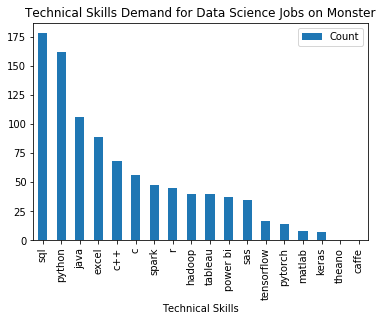

In [ ]:
df_tcount.plot(kind="bar")
plt.title('Technical Skills Demand for Data Science Jobs on Monster')

In [ ]:
df_bus = job_info_ai[business_skill]
bus_count = df_bus.sum()
bus_count = bus_count.sort_values(ascending=False)
df_bcount = pd.DataFrame(data=bus_count,columns=["Count"])
df_bcount.index.name = "Business Skills"
df_bcount
#plt.bar(,tech_count.to_list)

,Count
Business Skills,
communication,358.0
lead,208.0
leadership,170.0
documentation,136.0
collaborate,128.0
consulting,99.0
problem solving,79.0
marketing,63.0
presentation,50.0


Text(0.5, 1.0, 'Business Skills Demand for Data Science Jobs on Monster')

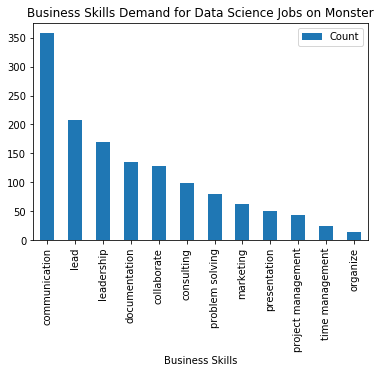

In [ ]:
df_bcount.plot(kind="bar")
plt.title('Business Skills Demand for Data Science Jobs on Monster')

In [ ]:
df = pd.read_csv('monster_ai.csv')
df.head(10)

,Unnamed: 0,employer,link,location,position_title,salary,excel,python,r,java,...,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize
0,0,SAPSOL TECHNOLOIGES INC,https://job-openings.monster.ca/freshers-in-ar...,"Mississauga, ON","Freshers in Artificial Intelligence, Machine l...",NaN,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Magna International Inc.,https://job-openings.monster.ca/robotics-weld-...,"Milton, ON",Robotics Weld Technician,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Kutir Technologies,https://job-openings.monster.ca/machine-learni...,"Mississauga, ON",Machine Learning (Computer Vision),NaN,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,ADGA Group,https://job-openings.monster.ca/cognos-etl-pro...,"Toronto, ON",Cognos/ETL Programmer/Developer,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"Modis, Inc.",https://job-openings.monster.ca/data-architect...,"Toronto, ON",Data Architect/Modeller,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,5,IBM CA,https://job-openings.monster.ca/data-modeller-...,"Toronto, ON",Data Modeller /SQL Developer,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,ISG Search Inc,https://job-openings.monster.ca/senior-manager...,"Toronto, ON","Senior Manager, Data Analytics (Retail/Mining)",NaN,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,Procom,https://job-openings.monster.ca/data-architect...,"Edmonton, AB",Data Architect,NaN,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,8,Hays,https://job-openings.monster.ca/lead-machine-l...,"Vancouver, BC",Lead Machine Learning Engineer,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,9,Randstad,https://job-openings.monster.ca/cloud-data-arc...,"Toronto, ON",Cloud Data Architect,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(['Unnamed: 0','employer', 'link', 'position_title','salary','location'],axis=1,inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   excel               713 non-null    float64
 1   python              713 non-null    float64
 2   r                   713 non-null    float64
 3   java                713 non-null    float64
 4   c                   713 non-null    float64
 5   c++                 713 non-null    float64
 6   matlab              713 non-null    float64
 7   sas                 713 non-null    float64
 8   sql                 713 non-null    float64
 9   tableau             713 non-null    float64
 10  hadoop              713 non-null    float64
 11  spark               713 non-null    float64
 12  power bi            713 non-null    float64
 13  tensorflow          713 non-null    float64
 14  keras               713 non-null    float64
 15  pytorch             713 non-null    float64
 16  theano  

In [ ]:
# count the number of empty entries in each feature
NaNcount = [df[x].isna().sum() for x in list(df)]
print(NaNcount)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
df['programming_skill']=df.iloc[:,0:18].sum(axis=1)
df['business_skill']=df.iloc[:,19:31].sum(axis=1)
df

,excel,python,r,java,c,c++,matlab,sas,sql,tableau,...,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize,programming_skill,business_skill
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
df1 = normalize(df)
df1 = pd.DataFrame(df1, columns=df.columns)
df1.head()

,excel,python,r,java,c,c++,matlab,sas,sql,tableau,...,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize,programming_skill,business_skill
0,0.0,0.147442,0.0,0.147442,0.147442,0.147442,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.589768,0.737210
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107
2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107
